simple linear regression

In [1]:
from warnings import  filterwarnings
filterwarnings('ignore')

In [3]:
import pandas as pd
df=pd.read_csv("50_Startups (1).csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [6]:
df.duplicated().sum()

0

<Axes: xlabel='RND', ylabel='PROFIT'>

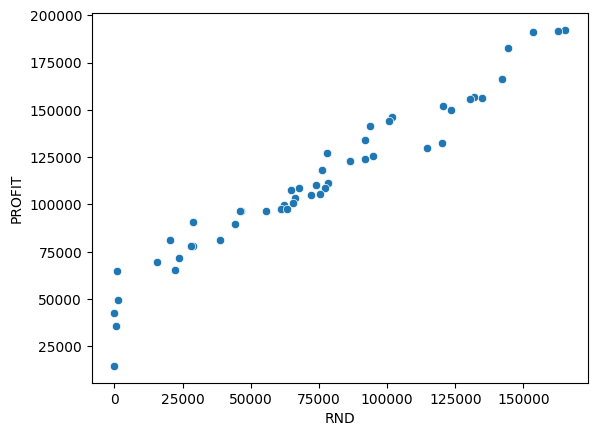

In [7]:
import seaborn as sns
sns.scatterplot(data=df,x='RND',y='PROFIT')

In [11]:
x=df[['RND']]
y=df[['PROFIT']]

In [12]:
x.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [13]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [14]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)

LinearRegression()

<Axes: xlabel='RND', ylabel='PROFIT'>

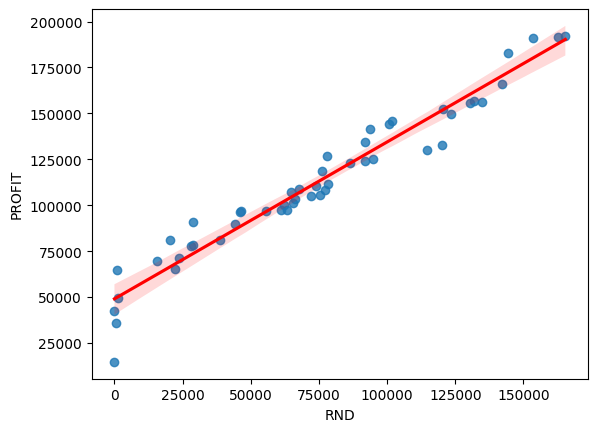

In [16]:
sns.regplot(data=df, x='RND', y='PROFIT', line_kws={'color':'red'},ci=99)